In [1]:
## XGBoost code from lab

In [2]:
import sklearn
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
## Importing data
df_training = pd.read_csv('training_clean')
df_test = pd.read_csv('test_clean')

In [4]:
## Dropping columns missed in the data cleaning process
ls_drop = ['addr_state_IA', 'home_ownership_OTHER', 'purpose_educational']
df_training = df_training.drop('Unnamed: 0', 1)
df_training = df_training.drop(ls_drop, 1)

In [5]:
df_test = df_test.drop('Unnamed: 0', 1)

In [6]:
X_train = df_training.drop('loan_status_current', 1)
X_test = df_test.drop('loan_status_current', 1)
y_train = df_training['loan_status_current']
y_test = df_test['loan_status_current']

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [9]:
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

In [10]:
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 99.91%
Validation accuracy: 96.05%


In [11]:
## Tuning XGBoost gridsearch

In [12]:
param_grid = {
    "learning_rate": [0.03, 0.1],
    'max_depth': [6, 8, 10],
    'min_child_weight': [10],
    'subsample': [0.7],
    'n_estimators': [30, 100, 250],
}

In [13]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

KeyboardInterrupt: 

In [ ]:
## XGboost grid search didnt finish after 13 hours

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
# Test set predictions
pred = clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[628531     71]
 [ 29905 100813]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    628602
           1       1.00      0.77      0.87    130718

    accuracy                           0.96    759320
   macro avg       0.98      0.89      0.92    759320
weighted avg       0.96      0.96      0.96    759320



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

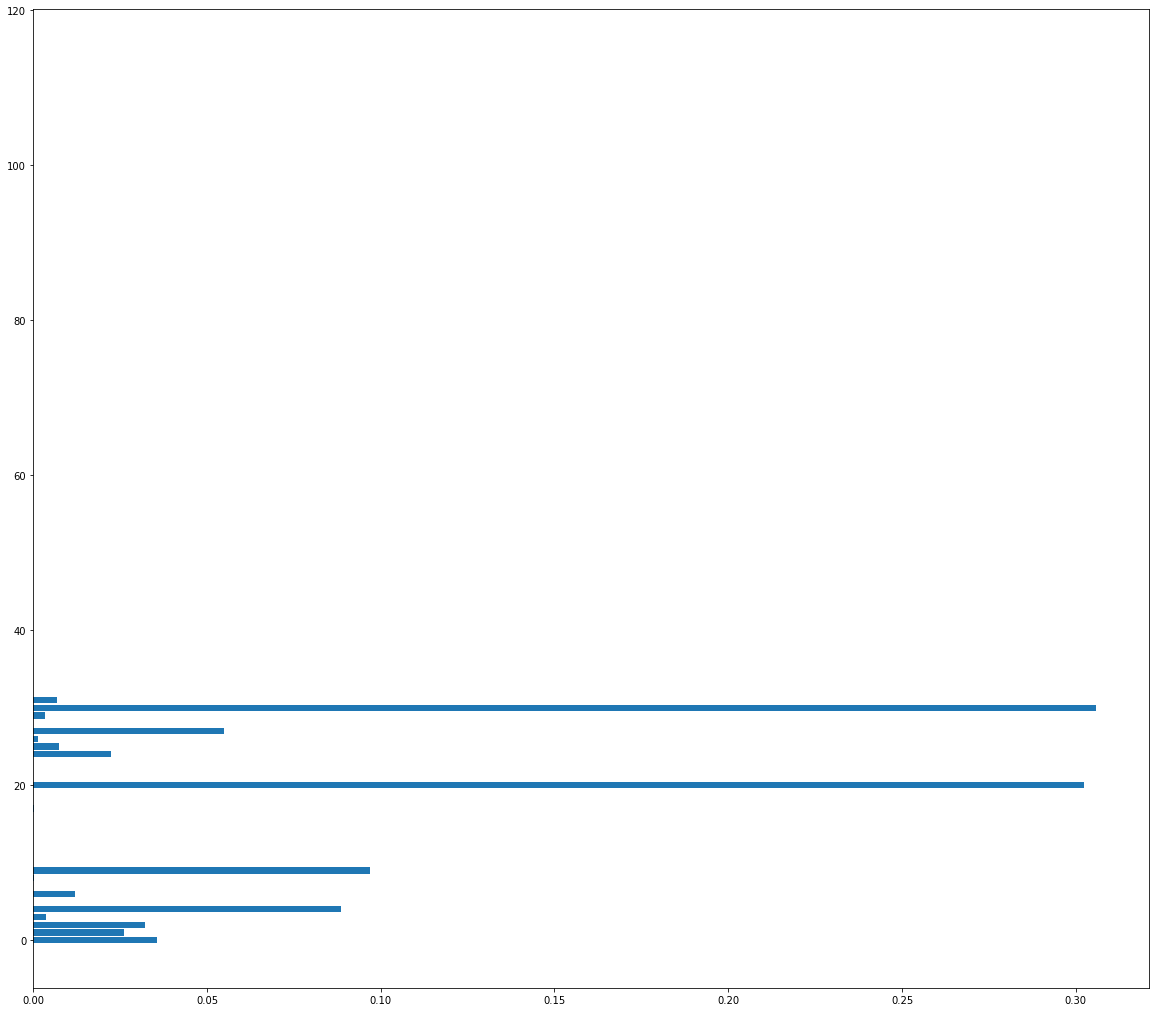

In [17]:
## Plotting feature importances of decision tree classifier
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,18))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)

In [ ]:
## Addressing AttributeError: 'numpy.ndarray' object has no attribute 'columns'